In [1]:
import polars as pl

In [2]:
from pathlib import Path

project_root = Path.cwd().parent
data_csv_path = project_root / "data" / "raw" / "job_market.csv"

df = pl.read_csv(str(data_csv_path))

In [3]:
import os
import sys


sys.path.append(os.path.abspath(".."))

In [4]:
from src.data.preprocessing import drop_unused_columns

df = drop_unused_columns(df, "job_market")

In [5]:
df.head(5)

job_title,company,location,job_type,category,salary_min,salary_max,experience_required,skills
str,str,str,str,str,i64,i64,i64,str
"""Engineering Manager""","""DataInc""","""San Francisco, CA""","""Remote""","""Technology""",151082,291345,4,"""AWS, Agile, Machine Learning, …"
"""Engineering Manager""","""EnterpriseHub""","""New York, NY""","""Remote""","""Technology""",156891,280075,3,"""Java, Agile, Git, SQL, Ruby, G…"
"""Engineering Manager""","""StartupXYZ""","""Seattle, WA""","""Part-time""","""Technology""",152134,280310,4,"""AWS, Python, Kubernetes, Git"""
"""Lead Engineer""","""WebDynamics""","""Seattle, WA""","""Full-time""","""Technology""",151918,253988,7,"""Agile, Git, Docker, REST APIs,…"
"""Senior Software Engineer""","""DigitalWorks""","""San Francisco, CA""","""Full-time""","""Technology""",148141,252584,9,"""Agile, Ruby, Docker, Git, Java…"


In [6]:
df.shape

(250, 9)

In [7]:
from src.data.preprocessing import clean_outliers


df = clean_outliers(df, "job_market")

In [8]:
df.shape

(247, 9)

{'whiskers': [<matplotlib.lines.Line2D at 0x20c0843f800>,
 'caps': [<matplotlib.lines.Line2D at 0x20c0843fe30>,
 'boxes': [<matplotlib.lines.Line2D at 0x20c0843e6c0>],
 'medians': [<matplotlib.lines.Line2D at 0x20c0846c440>],
 'fliers': [<matplotlib.lines.Line2D at 0x20c0846c740>],
 'means': []}

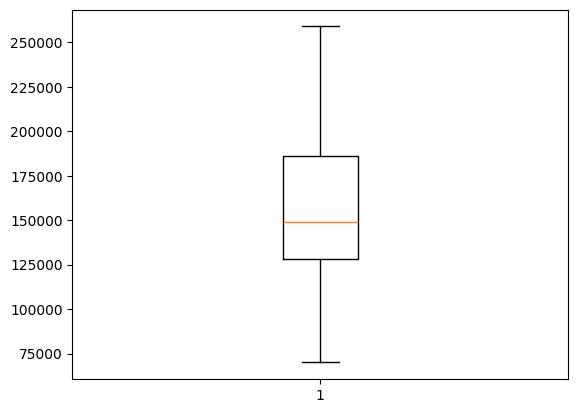

In [9]:
from matplotlib import pyplot as plt


plt.boxplot(df["salary_max"].to_pandas(), vert=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x20c084e3a40>,
 'caps': [<matplotlib.lines.Line2D at 0x20c0851c050>,
 'boxes': [<matplotlib.lines.Line2D at 0x20c0848afc0>],
 'medians': [<matplotlib.lines.Line2D at 0x20c0851c650>],
 'fliers': [<matplotlib.lines.Line2D at 0x20c0851c950>],
 'means': []}

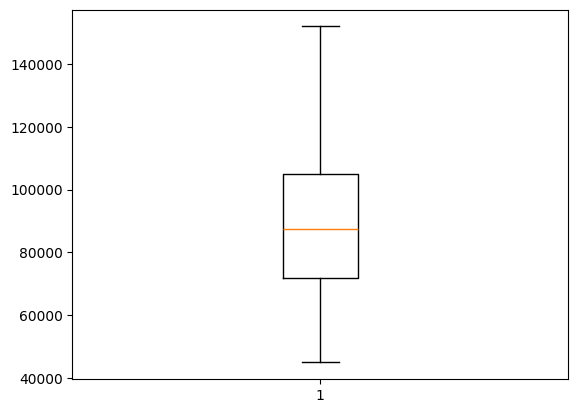

In [10]:
plt.boxplot(df["salary_min"].to_pandas(), vert=True)

In [11]:
from src.data.preprocessing import handle_nulls


df = handle_nulls(df, "job_market")

In [12]:
df.null_count()

job_title,company,location,job_type,category,salary_min,salary_max,experience_required,skills
u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,50


In [13]:
from src.data.preprocessing import add_salary_mean


df = add_salary_mean(df)

In [14]:
df.head(5)

job_title,company,location,job_type,category,experience_required,skills,salary_mean
str,str,str,str,str,f64,str,f64
"""Lead Engineer""","""WebDynamics""","""Seattle, WA""","""Full-time""","""Technology""",7.0,"""Agile, Git, Docker, REST APIs,…",202953.0
"""Senior Software Engineer""","""DigitalWorks""","""San Francisco, CA""","""Full-time""","""Technology""",9.0,"""Agile, Ruby, Docker, Git, Java…",200362.5
"""Senior Software Engineer""","""WebDynamics""","""Seattle, WA""","""Part-time""","""Technology""",8.0,"""CI/CD, Python, Kubernetes, Jav…",197964.5
"""Senior Data Scientist""","""WebDynamics""","""Seattle, WA""","""Part-time""","""Technology""",11.0,"""Machine Learning, TypeScript, …",196812.5
"""Lead Engineer""","""AI Solutions""","""San Francisco, CA""","""Contract""","""Technology""",11.0,"""Java, Python, Machine Learning""",196292.5


{'whiskers': [<matplotlib.lines.Line2D at 0x20c0855a5d0>,
 'caps': [<matplotlib.lines.Line2D at 0x20c0855abd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20c0855a360>],
 'medians': [<matplotlib.lines.Line2D at 0x20c0855b170>],
 'fliers': [<matplotlib.lines.Line2D at 0x20c0855b410>],
 'means': []}

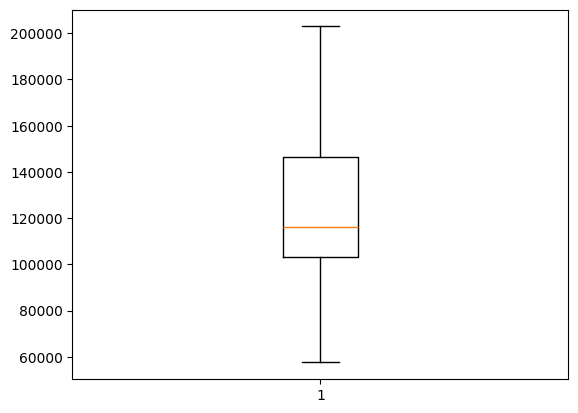

In [15]:
plt.boxplot(df["salary_mean"].to_pandas(), vert=True)

array([[<Axes: title={'center': 'salary_mean'}>]], dtype=object)

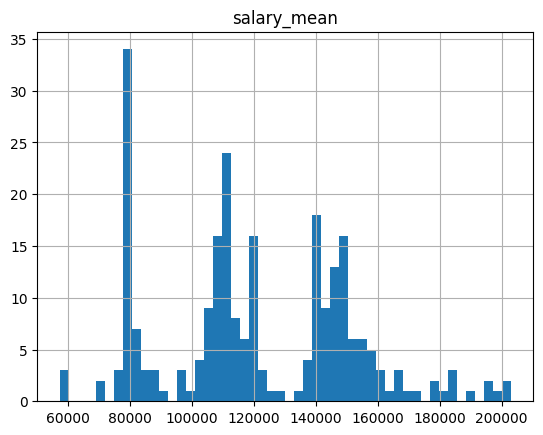

In [16]:
df.select("salary_mean").to_pandas().hist(bins=50)

In [17]:
from src.data.preprocessing import one_hot_encode


df = one_hot_encode(df, "job_market")

In [18]:
df.head(5)

job_title,company,location,experience_required,skills,salary_mean,job_type_Full time,job_type_Full-time,job_type_Internship,job_type_Part-time,job_type_Remote,job_type_Unknown,job_type_Working student,job_type_berufseinstieg,job_type_berufserfahren,job_type_manager,job_type_professional / experienced,category_HR,category_Helpdesk,category_Marketing and Communication,category_Media Planning,category_Process Engineering,category_Recruitment and Selection,category_Remote,category_SAP/ERP Consulting,category_Social Media Manager,category_Software Development,category_Technology,category_Unknown
str,str,str,f64,str,f64,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8
"""Lead Engineer""","""WebDynamics""","""Seattle, WA""",7.0,"""Agile, Git, Docker, REST APIs,…",202953.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
"""Senior Software Engineer""","""DigitalWorks""","""San Francisco, CA""",9.0,"""Agile, Ruby, Docker, Git, Java…",200362.5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
"""Senior Software Engineer""","""WebDynamics""","""Seattle, WA""",8.0,"""CI/CD, Python, Kubernetes, Jav…",197964.5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
"""Senior Data Scientist""","""WebDynamics""","""Seattle, WA""",11.0,"""Machine Learning, TypeScript, …",196812.5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
"""Lead Engineer""","""AI Solutions""","""San Francisco, CA""",11.0,"""Java, Python, Machine Learning""",196292.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [19]:
from src.data.preprocessing import mean_target_encode


df = mean_target_encode(df, "job_market")

In [20]:
df.head(5)

experience_required,skills,salary_mean,job_type_Full time,job_type_Full-time,job_type_Internship,job_type_Part-time,job_type_Remote,job_type_Unknown,job_type_Working student,job_type_berufseinstieg,job_type_berufserfahren,job_type_manager,job_type_professional / experienced,category_HR,category_Helpdesk,category_Marketing and Communication,category_Media Planning,category_Process Engineering,category_Recruitment and Selection,category_Remote,category_SAP/ERP Consulting,category_Social Media Manager,category_Software Development,category_Technology,category_Unknown,job_title_mte,company_mte,location_mte
f64,str,f64,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,f64,f64,f64
7.0,"""Agile, Git, Docker, REST APIs,…",202953.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,168046.888889,130487.73913,155055.5
9.0,"""Agile, Ruby, Docker, Git, Java…",200362.5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,161118.0,130429.275,153501.153846
8.0,"""CI/CD, Python, Kubernetes, Jav…",197964.5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,161118.0,130487.73913,155055.5
11.0,"""Machine Learning, TypeScript, …",196812.5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,161961.5,130487.73913,155055.5
11.0,"""Java, Python, Machine Learning""",196292.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,168046.888889,128877.0,153501.153846


In [21]:
from src.data.preprocessing import preprocess_skills


df = preprocess_skills(df)

In [22]:
df.head(5)

experience_required,salary_mean,job_type_Full time,job_type_Full-time,job_type_Internship,job_type_Part-time,job_type_Remote,job_type_Unknown,job_type_Working student,job_type_berufseinstieg,job_type_berufserfahren,job_type_manager,job_type_professional / experienced,category_HR,category_Helpdesk,category_Marketing and Communication,category_Media Planning,category_Process Engineering,category_Recruitment and Selection,category_Remote,category_SAP/ERP Consulting,category_Social Media Manager,category_Software Development,category_Technology,category_Unknown,job_title_mte,company_mte,location_mte,Ruby,Machine Learning,Agile,Java,MongoDB,TensorFlow,REST APIs,Go,SQL,React,Node.js,Git,Python,JavaScript,Kubernetes,AWS,TypeScript,CI/CD,Docker
f64,f64,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,f64,f64,f64,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8,i8
7.0,202953.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,168046.888889,130487.73913,155055.5,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1
9.0,200362.5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,161118.0,130429.275,153501.153846,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
8.0,197964.5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,161118.0,130487.73913,155055.5,0,1,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,1,1
11.0,196812.5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,161961.5,130487.73913,155055.5,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,1
11.0,196292.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,168046.888889,128877.0,153501.153846,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [23]:
df.null_count()

experience_required,salary_mean,job_type_Full time,job_type_Full-time,job_type_Internship,job_type_Part-time,job_type_Remote,job_type_Unknown,job_type_Working student,job_type_berufseinstieg,job_type_berufserfahren,job_type_manager,job_type_professional / experienced,category_HR,category_Helpdesk,category_Marketing and Communication,category_Media Planning,category_Process Engineering,category_Recruitment and Selection,category_Remote,category_SAP/ERP Consulting,category_Social Media Manager,category_Software Development,category_Technology,category_Unknown,job_title_mte,company_mte,location_mte,Ruby,Machine Learning,Agile,Java,MongoDB,TensorFlow,REST APIs,Go,SQL,React,Node.js,Git,Python,JavaScript,Kubernetes,AWS,TypeScript,CI/CD,Docker
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
df.describe()

statistic,experience_required,salary_mean,job_type_Full time,job_type_Full-time,job_type_Internship,job_type_Part-time,job_type_Remote,job_type_Unknown,job_type_Working student,job_type_berufseinstieg,job_type_berufserfahren,job_type_manager,job_type_professional / experienced,category_HR,category_Helpdesk,category_Marketing and Communication,category_Media Planning,category_Process Engineering,category_Recruitment and Selection,category_Remote,category_SAP/ERP Consulting,category_Social Media Manager,category_Software Development,category_Technology,category_Unknown,job_title_mte,company_mte,location_mte,Ruby,Machine Learning,Agile,Java,MongoDB,TensorFlow,REST APIs,Go,SQL,React,Node.js,Git,Python,JavaScript,Kubernetes,AWS,TypeScript,CI/CD,Docker
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",247.0,247.0,247.0,247.0,247.0,247.0,247.0,247.0,247.0,247.0,247.0,247.0,247.0,247.0,247.0,247.0,247.0,247.0,247.0,247.0,247.0,247.0,247.0,247.0,247.0,247.0,247.0,247.0,247.0,247.0,247.0,247.0,247.0,247.0,247.0,247.0,247.0,247.0,247.0,247.0,247.0,247.0,247.0,247.0,247.0,247.0,247.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",4.194332,121207.477733,0.012146,0.202429,0.004049,0.194332,0.214575,0.117409,0.012146,0.004049,0.024291,0.004049,0.008097,0.004049,0.004049,0.024291,0.004049,0.004049,0.004049,0.044534,0.004049,0.008097,0.016194,0.797571,0.080972,121207.477733,121207.477733,121207.477733,0.214575,0.283401,0.222672,0.186235,0.149798,0.174089,0.214575,0.238866,0.202429,0.210526,0.210526,0.230769,0.267206,0.218623,0.186235,0.218623,0.222672,0.226721,0.234818
"""std""",2.252976,31143.955748,0.109759,0.402626,0.063628,0.396489,0.411361,0.322561,0.109759,0.063628,0.154265,0.063628,0.089801,0.063628,0.063628,0.154265,0.063628,0.063628,0.063628,0.206698,0.063628,0.089801,0.126479,0.402626,0.273345,27983.821657,17078.148366,19764.459364,0.411361,0.451564,0.416885,0.390086,0.357598,0.379956,0.411361,0.427257,0.402626,0.40851,0.40851,0.422181,0.4434,0.414152,0.390086,0.414152,0.416885,0.419561,0.424746
"""min""",0.0,57500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57500.0,57500.0,57500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""25%""",3.0,103167.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,100154.6875,117664.891304,114412.518519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""50%""",4.0,115937.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,122879.714286,126869.441176,118953.0625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""75%""",5.0,146678.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,140000.0,130429.275,125708.911765,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
"""max""",12.0,202953.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,169614.666667,150000.0,155055.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
